In [1]:
import sys
print(sys.path)

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\单细胞\\跨物种\\came\\CAME_3\\analysis\\jupyterlab\\4cortex_integration', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\python39.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin']


In [2]:
import os
import time
import torch
import shutil
import warnings
import argparse
import importlib
import scanpy as sc

import pandas as pd
import numpy as mp

from CAMEX.base import Dataset
from CAMEX.trainer import Trainer

warnings.filterwarnings("ignore")

In [3]:
from params import PARAMS

In [4]:
sc.settings.set_figure_params(facecolor='white', frameon=False, dpi=300, dpi_save=300, figsize=(4, 4))

In [5]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

In [6]:
# path = './'

In [7]:
time_start = time.strftime("%Y-%m-%d-%H-%M-%S")
log_path = f'./log/{time_start}/'
for k, v in PARAMS.items():
    v['time_start'] = time_start
    v['log_path'] = log_path
print(log_path)

./log/2024-03-29-21-58-46/


In [8]:
os.makedirs(log_path, exist_ok=True)
shutil.copy('params.py', log_path + 'params_current.py')
print(f'time: {time_start}')

time: 2024-03-29-21-58-46


In [9]:
#  —————————————————————————————————— 1 preprocess
print('start preprocess')
dataset = Dataset(**PARAMS['preprocess'])
# torch.save(dataset, log_path + 'dataset_preprocessed.pt')
# dataset = torch.load(f'{args.path}/log/2023-06-06-09-02-45/dataset_preprocessed.pt')
adata_CAMEX = dataset.adata_whole
dgl_data = dataset.dgl_data

start preprocess
                                raw-brain-human-Lake: reference  raw-brain-mouse-Chen: query  raw-brain-lizard-Tosches: query  raw-brain-turtle-Tosches: query
excitatory neuron                                       14747.0                        906.0                           1910.0                           7151.0
inhibitory neuron                                        6808.0                       1392.0                            242.0                           1490.0
oligodendrocyte                                          4369.0                       3724.0                            551.0                            155.0
cerebellar granule cell                                  3298.0                          NaN                              NaN                              NaN
astrocyte                                                2524.0                       1757.0                            520.0                           6514.0
oligodendrocyte precursor cel

In [10]:
print('start train')
trainer = Trainer(adata_CAMEX, dgl_data, **PARAMS['train'])

start train


In [11]:
trainer.pretrain()

--------------------------------------------- pretrain ---------------------------------------------
epoch: 0, loss: 85.39494814523836
epoch: 1, loss: 26.94998699281274
epoch: 2, loss: 26.648430894060834
epoch: 3, loss: 26.487519520085034
epoch: 4, loss: 26.399940234858814
epoch: 5, loss: 26.272940054172423
epoch: 6, loss: 26.22483867552222
epoch: 7, loss: 26.191739803407252
epoch: 8, loss: 26.145040349262516
epoch: 9, loss: 26.082818543038716


In [12]:
trainer.train()

--------------------------------------------- train ---------------------------------------------
epoch: 0, loss: 87.29477030038834
train_acc: {'raw-brain-human-Lakecell_acc': 0.9399}, test_acc: {'raw-brain-lizard-Toschescell_acc': 0.9363, 'raw-brain-mouse-Chencell_acc': 0.6045, 'raw-brain-turtle-Toschescell_acc': 0.9184}, train_ami:{'raw-brain-human-Lakecell_ami': 0.6696, 'raw-brain-lizard-Toschescell_ami': 0.7338, 'raw-brain-mouse-Chencell_ami': 0.5751, 'raw-brain-turtle-Toschescell_ami': 0.6496}, best_epoch: 0
epoch: 1, loss: 55.88644486665726
train_acc: {'raw-brain-human-Lakecell_acc': 0.9478}, test_acc: {'raw-brain-lizard-Toschescell_acc': 0.9303, 'raw-brain-mouse-Chencell_acc': 0.6849, 'raw-brain-turtle-Toschescell_acc': 0.9244}, train_ami:{'raw-brain-human-Lakecell_ami': 0.6728, 'raw-brain-lizard-Toschescell_ami': 0.7474, 'raw-brain-mouse-Chencell_ami': 0.6728, 'raw-brain-turtle-Toschescell_ami': 0.6538}, best_epoch: 1
epoch: 2, loss: 53.90859133005142
train_acc: {'raw-brain-hum

In [13]:
adata_CAMEX.write_h5ad(log_path + 'adata_CAMEX.h5ad', compression='gzip')

# analysis

In [7]:
log_path

'./log/2024-03-29-21-58-46/'

In [8]:
adata_CAMEX = sc.read_h5ad(log_path + 'adata_CAMEX.h5ad')
adata_CAMEX

AnnData object with n_obs × n_vars = 69985 × 2000
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name', 'donor', 'organ', 'organism', 'platform', 'region', 'tSNE1', 'tSNE2', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'cell_pretrain_hidden', 'cell_train_class', 'cell_train_hidden', 'cell_train_hidden_eval'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
adata_CAMEX.obs.head(5)

cell_ontology_class cell_ontology_id cell_type1 dataset_name donor  organ      organism    platform region      tSNE1      tSNE2                 batch  n_genes_by_counts  total_counts  cell_ontology_class_num               cell_class  cell_class_num
index                                                                                                                                                                                                                                                                                
Gran_cbm1_TTAATCAGTCGC  cerebellar granule cell       CL:0001031       Gran    Lake_2018     1  Brain  Homo sapiens  snDrop-seq    cbm -26.725456 -30.189707  raw-brain-human-Lake                708        1090.0                        3  cerebellar granule cell               3
Gran_cbm1_ACAACGACATCC  cerebellar granule cell       CL:0001031       Gran    Lake_2018     1  Brain  Homo sapiens  snDrop-seq    cbm -31.022097 -22.272980  raw-brain-human-Lake                646         915.0                        3  cerebellar granule cell               3
Gran_cbm1_TATGTCTATATG  cerebellar granule cell       CL:0001031       Gran    Lake_2018     1  Brain  Homo sapiens  snDrop-seq    cbm -35.684959 -24.031462  raw-brain-human-Lake                701        1053.0                        3  cerebellar granule cell               3
Gran_cbm1_TAATGGAAAATA  cerebellar granule cell       CL:0001031       Gran    Lake_2018     1  Brain  Homo sapiens  snDrop-seq    cbm -25.886816 -33.706535  raw-brain-human-Lake                715        1115.0                        3  cerebellar granule cell               3
Gran_cbm1_CTGGACTACAGC  cerebellar granule cell       CL:0001031       Gran    Lake_2018     1  Brain  Homo sapiens  snDrop-seq    cbm -25.068712 -36.672504  raw-brain-human-Lake                651         960.0                        3  cerebellar granule cell               3

In [10]:
adata_CAMEX.obsm['cell_train_hidden'].shape

(69985, 128)

In [11]:
sc.pp.neighbors(adata_CAMEX, use_rep='cell_train_hidden')

In [12]:
sc.tl.umap(adata_CAMEX)

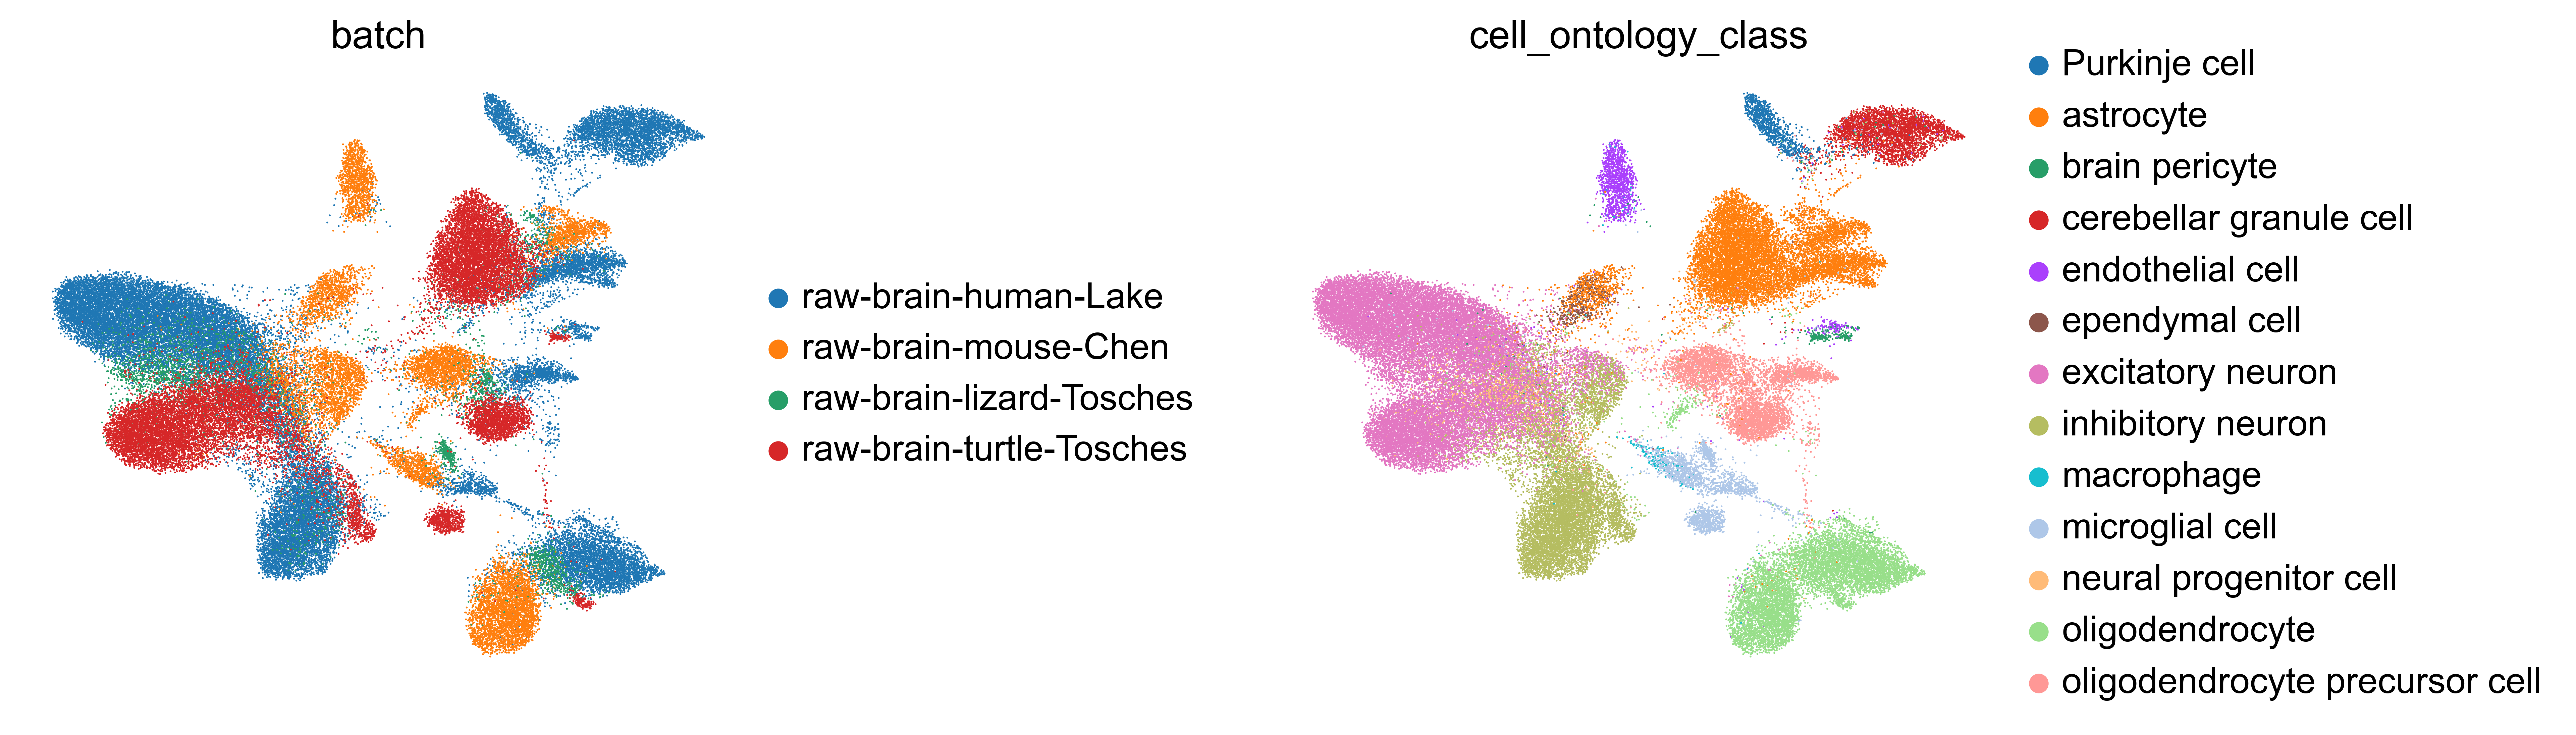

In [13]:
sc.pl.umap(adata_CAMEX, color=['batch', 'cell_ontology_class'], wspace=0.6)

In [14]:
sc.pp.neighbors(adata_CAMEX, use_rep='cell_pretrain_hidden')

In [15]:
sc.tl.umap(adata_CAMEX)

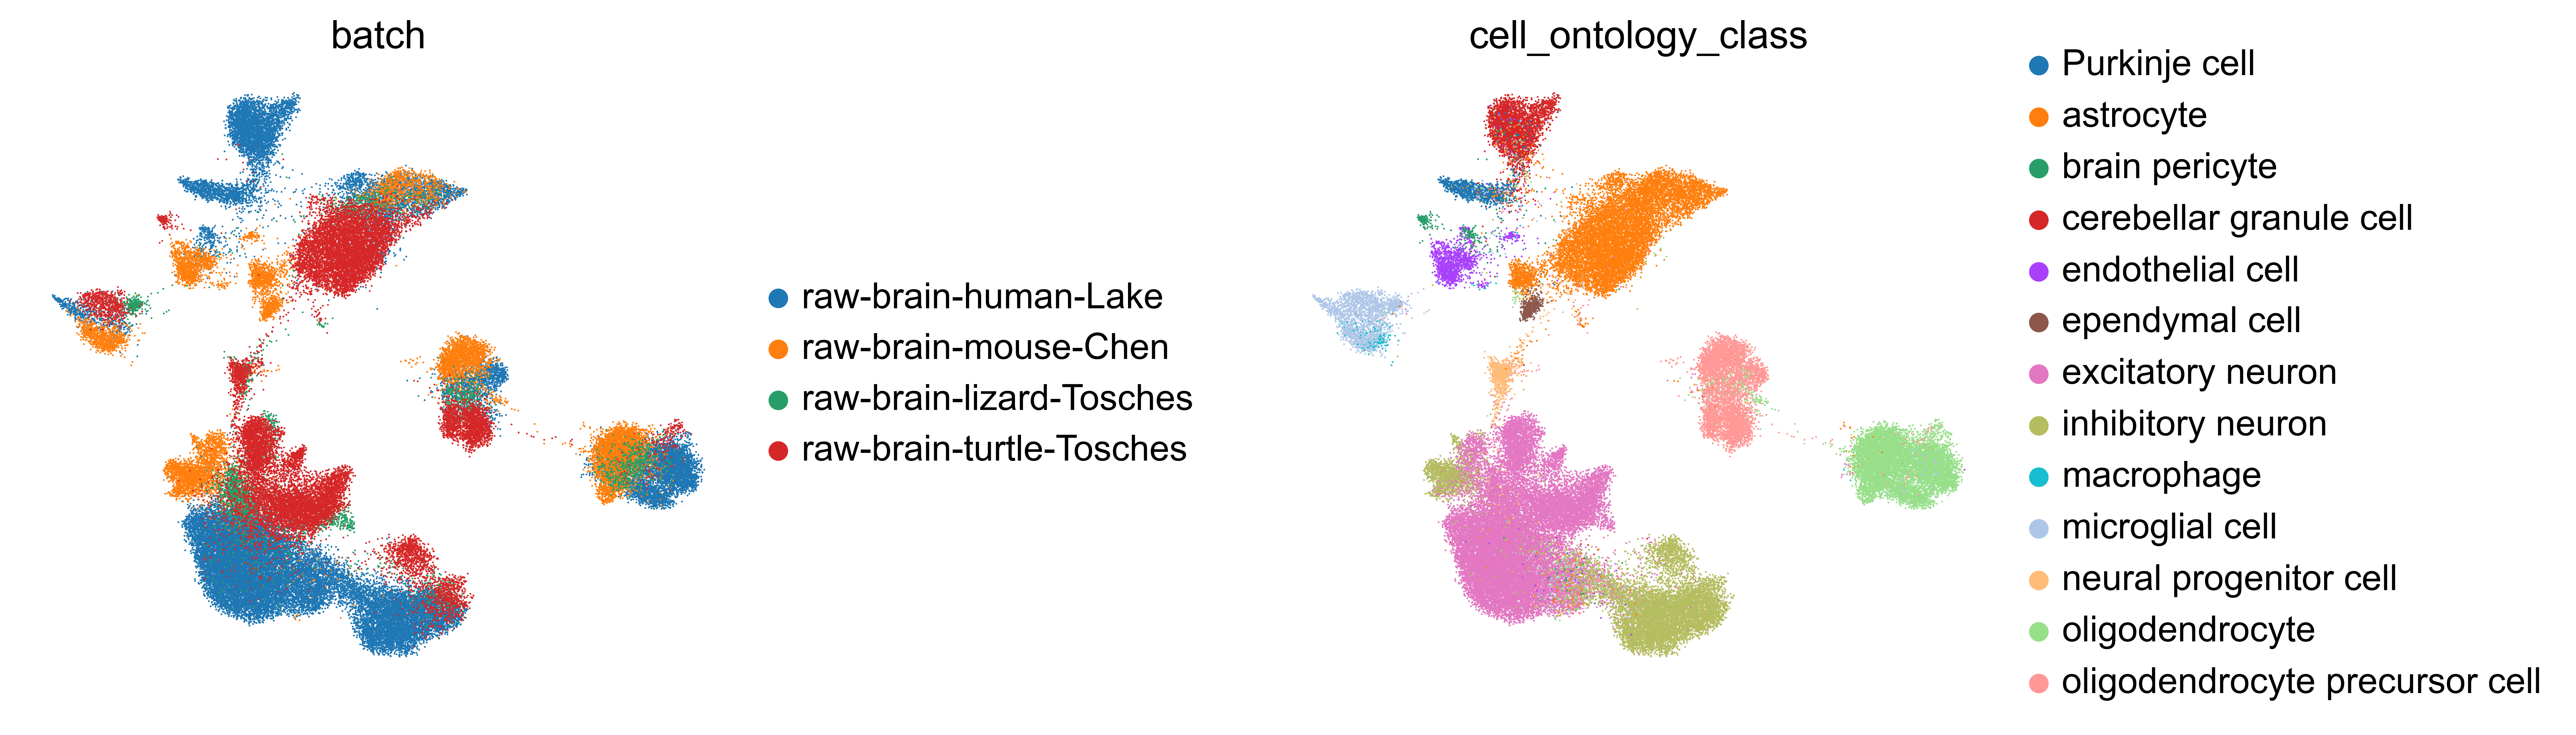

In [16]:
sc.pl.umap(adata_CAMEX, color=['batch', 'cell_ontology_class'], wspace=0.6)